#Evaluación Final - Diplomado Data Science Duoc UC

# Módulo: Machine Learning

A continuación, aplicarás lo aprendido con el uso de las librerías de Python desde fuentes de datos proporcionadas por el relator.

**Recuerda almacenar una copia de este Jupyter Notebook en tu Google Drive para poder ejecutar los bloques de código.**


---
Proponga al menos 6 preguntas que podamos responder con un modelo de Machine Learning, que permita hacer una proyección o una clasificación de acuerdo al aspecto elegido de los datos.

Detecte correlaciones relevantes que permitan hacer más óptimo el modelo de ML en combinación con los algoritmos e hiperparámetros adecuados de acuerdo a la solución planteada.

Elabore un informe en Jupyter Notebook haciendo uso de cuadros de texto y cuadros de código para robustecer la solución planteada.


Datos: https://drive.google.com/file/d/1APpywYHEexQEGElHT5CJUoz9RgWdohqh/view?usp=sharing


---



**Recuerda hacer uso de todo lo aprendido! mientras más cosas descubras de los datos, más robusto será tu análisis.** 

# Análisis Exploratorio de Datos

#### Importamos librerías escenciales

In [153]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt

#### Importamos los modelos de Clasificación

In [154]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

#### Importamos los modelos de Regresión

In [155]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

#### Importamos librerias necesarias para trabajar el modelo

In [156]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RepeatedKFold, train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

#### Lectura inicial del dataset    

In [157]:
df = pd.read_excel('PlayStore.xlsx') #Hacemos lectura del dataset
df.head()

,App,Categoría,Valoración,Comentarios,Tamaño(M),Descargas,Tipo,Precio,Clasificación
0,AJ Styles HD Wallpapers,ARTE Y DISEÑO,4.8,48,25.0,"5,000 aprox.",Gratis,0.0,Todo público
1,I Creative Idea,ARTE Y DISEÑO,4.7,353,4.2,"10,000 aprox.",Gratis,0.0,Adolescentes
2,Infinite Painter,ARTE Y DISEÑO,4.1,36815,29.0,"1,000,000 aprox.",Gratis,0.0,Todo público
3,FlipaClip - Cartoon animation,ARTE Y DISEÑO,4.3,194216,39.0,"5,000,000 aprox.",Gratis,0.0,Todo público
4,Text on Photo - Fonteee,ARTE Y DISEÑO,4.4,13880,28.0,"1,000,000 aprox.",Gratis,0.0,Todo público


In [158]:
# Análisis preliminar del modelo
print(df.shape)
print(df.info())

(9141, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9141 entries, 0 to 9140
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   App            9141 non-null   object 
 1   Categoría      9141 non-null   object 
 2   Valoración     7725 non-null   float64
 3   Comentarios    9141 non-null   int64  
 4   Tamaño(M)      9141 non-null   float64
 5   Descargas      9141 non-null   object 
 6   Tipo           9141 non-null   object 
 7   Precio         9141 non-null   float64
 8   Clasificación  9141 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 642.9+ KB
None


#### Como podemos apreciar, el dataset consta de 9 columnas y 9141 filas
#### Todos los valores, a excepción de la valoración están 100% integros (1416 valores perdidos)
#### La columna 'Descargas' debe parsearse a un valor numérico

In [159]:
df.Descargas = df.Descargas.apply(lambda x: x.replace(' aprox.', ''))
df.Descargas = df.Descargas.apply(lambda x: x.replace(',', ''))
df.Descargas = df.Descargas.astype(np.float64)
df.Comentarios = df.Comentarios.astype(np.float64)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9141 entries, 0 to 9140
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   App            9141 non-null   object 
 1   Categoría      9141 non-null   object 
 2   Valoración     7725 non-null   float64
 3   Comentarios    9141 non-null   float64
 4   Tamaño(M)      9141 non-null   float64
 5   Descargas      9141 non-null   float64
 6   Tipo           9141 non-null   object 
 7   Precio         9141 non-null   float64
 8   Clasificación  9141 non-null   object 
dtypes: float64(5), object(4)
memory usage: 642.9+ KB


In [160]:
df[['Valoración', 'Tamaño(M)', 'Precio']].describe()

,Valoración,Tamaño(M),Precio
count,7725.000000,9141.000000,9141.000000
mean,4.173735,37.047391,1.184885
std,0.544548,98.893732,17.359533
min,1.000000,1.000000,0.000000
25%,4.000000,5.600000,0.000000
50%,4.300000,15.000000,0.000000
75%,4.500000,34.000000,0.000000
max,5.000000,1020.000000,400.000000


In [161]:
df[['Comentarios', 'Descargas']].describe().astype(np.int64)

,Comentarios,Descargas
count,9141,9141
mean,249157,7117898
std,1716578,46203441
min,0,0
25%,22,1000
50%,742,100000
75%,25094,1000000
max,44893888,1000000000


#### Analizamos posibles variables explicativas

In [162]:
df.Tipo.value_counts()

Gratis    8417
Pago       724
Name: Tipo, dtype: int64

In [163]:
df.App.value_counts()

ROBLOX                                         9
Candy Crush Saga                               7
8 Ball Pool                                    7
Nick                                           6
Zombie Catchers                                6
                                              ..
BM Pharmacy                                    1
BM SPM Practice                                1
Klix.ba                                        1
Square InPic - Photo Editor & Collage Maker    1
Ever After High™ Charmed Style                 1
Name: App, Length: 8430, dtype: int64

In [164]:
df.Clasificación.value_counts()

Todo público          7415
Adolescentes           986
Mayores de 17 años     405
Mayores de 10 años     331
Sin clasificación        2
Sólo adultos             2
Name: Clasificación, dtype: int64

In [165]:
df.Categoría.value_counts()

FAMILIA                   1770
JUEGO                     1051
HERRAMIENTAS               738
MÉDICO                     433
NEGOCIO                    400
PERSONALIZACIÓN            356
ESTILO DE VIDA             349
DEPORTES                   310
FINANCIERAS                306
PRODUCTIVIDAD              303
SALUD Y BELLEZA            265
COMUNICACIÓN               264
FOTOGRAFÍA                 253
NOTICIAS                   215
DATOS                      212
SOCIAL                     209
COMPRAS                    201
LIBROS Y REFRERENCIAS      197
VIAJES                     192
REPRODUCTORES DE VIDEO     129
EDUCACIÓN                  124
MAPAS Y NAVEGACIÓN         108
ENTRETENIMIENTO            102
COMIDA Y BEBIDA            100
LIBRERIAS                   82
VEHICULOS                   75
CASA Y HOGAR                68
ARTE Y DISEÑO               65
EVENTOS                     57
CLIMA                       57
PADRES                      53
HISTORIETAS                 50
BELLEZA 

In [166]:
# Optamos por droppear las valoraciones nulas
df = df.dropna(axis=0, how='any')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7725 entries, 0 to 9140
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   App            7725 non-null   object 
 1   Categoría      7725 non-null   object 
 2   Valoración     7725 non-null   float64
 3   Comentarios    7725 non-null   float64
 4   Tamaño(M)      7725 non-null   float64
 5   Descargas      7725 non-null   float64
 6   Tipo           7725 non-null   object 
 7   Precio         7725 non-null   float64
 8   Clasificación  7725 non-null   object 
dtypes: float64(5), object(4)
memory usage: 603.5+ KB


In [167]:
# Usaremos LabelEncoder para transformar variables categóricas a numéricas
for col in ['App', 'Categoría', 'Tipo', 'Clasificación']:
    df[col + '_processed'] = LabelEncoder().fit_transform(df[col].astype(str))
df.head()

,App,Categoría,Valoración,Comentarios,Tamaño(M),Descargas,Tipo,Precio,Clasificación,App_processed,Categoría_processed,Tipo_processed,Clasificación_processed
0,AJ Styles HD Wallpapers,ARTE Y DISEÑO,4.8,48.0,25.0,5000.0,Gratis,0.0,Todo público,215,0,0,5
1,I Creative Idea,ARTE Y DISEÑO,4.7,353.0,4.2,10000.0,Gratis,0.0,Adolescentes,3821,0,0,0
2,Infinite Painter,ARTE Y DISEÑO,4.1,36815.0,29.0,1000000.0,Gratis,0.0,Todo público,3875,0,0,5
3,FlipaClip - Cartoon animation,ARTE Y DISEÑO,4.3,194216.0,39.0,5000000.0,Gratis,0.0,Todo público,3236,0,0,5
4,Text on Photo - Fonteee,ARTE Y DISEÑO,4.4,13880.0,28.0,1000000.0,Gratis,0.0,Todo público,6114,0,0,5


In [168]:
df.drop(labels=['App', 'Categoría', 'Tipo', 'Clasificación'], axis=1, inplace=True)
df.head()

,Valoración,Comentarios,Tamaño(M),Descargas,Precio,App_processed,Categoría_processed,Tipo_processed,Clasificación_processed
0,4.8,48.0,25.0,5000.0,0.0,215,0,0,5
1,4.7,353.0,4.2,10000.0,0.0,3821,0,0,0
2,4.1,36815.0,29.0,1000000.0,0.0,3875,0,0,5
3,4.3,194216.0,39.0,5000000.0,0.0,3236,0,0,5
4,4.4,13880.0,28.0,1000000.0,0.0,6114,0,0,5


<AxesSubplot:>

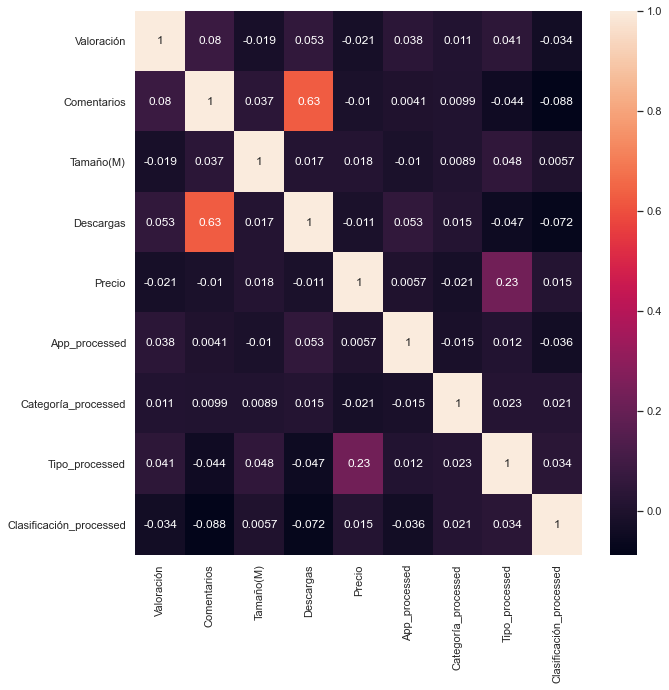

In [169]:
sbn.set(
    rc={
        'figure.figsize' : (10,10)
    }
)
sbn.heatmap(
    df.corr(),
    annot=True
)

## Plantée sus preguntas acá

1. ¿Cómo se correlaciona la cantidad de descargas con el tipo de App?
2. ¿Como se correlaciona la valoración de las apps con su categoría?
3. ¿Como se corrrelaciona la cantidad de descargas con la clasificación?
4. ¿Es posible predecir la cantidad de descargas que tendrá una app según sus características?
5. ¿Es posible predecir que tipo de app tendrá mayor éxito considerando sus características?
6. ¿Es posible predecir el retorno de inversión de una aplicación de pago?

# Propuesta de limpieza


### Ejecución de limpieza 1 

* Identificación de tipos de datos de cada columna: Nos permite conocer qué datos corresponden números, cuales a strings, cuales a booleanos, fechas etc
* Identifiación de valores núlos y no nulos en cada columna: Nos permite conocer la integridad de la información
* Tomar la decisión: ¿Imputar o eliminar la información del dataframe?: Se debe definir la factibilidad de inferir el valor de un dato vacío, 
        o bien deshacerse de éste, en función de su nivel de importancia dentro del modelo.

### Ejecución de limpieza 2 

* Remover variables no explicativas: Aquellas columnas que no aporten valor al modelo deben ser purgadas de este
* Mantener variables categóricas: Las variables categóricas permiten conocer cómo se segmenta la información

### Ejecución de limpieza 3 


* Estandarizar: dentro de lo posible, generar un estándar para nombrar las columnas (camel case, notación húngara, entre otros). Esto hará mucho más cómodo manipular la información.
* Eliminar columnas que no aporten valor al modelo.

### Ejecución de limpieza 3 

* Transformar a valores numéricos las variables explicativas con el fin de identificar correlaciones

## Escribir una pequeña reseña de los resultados analizados y las correlaciones que  usaría para implementar un modelo de Machine Learning.

Según nuestra matriz de correlaciones, la asociación más alta entre columnas es la cantidad de descargas con la cantidad de comentarios.

Sin embargo, sería interesante explicar la cantidad de descargas de una aplicación según las siguientes dimensiones:

* Tipo
* Categoría
* Clasificación
* Valoración
* Tamaño

El objetivo final del modelo es apoyar a definir hacia donde destinar los esfuerzos de desarrollo de aplicaciones, de modo que estas generen el mayor retorno de inversión posible.

# Implemente sus modelos desde aquí

### Modelos de clasificación

In [170]:
#Hacemos el split de la data. Queremos predecir el tipo de aplicación.
train_data, test_data, train_label, test_label = train_test_split(
    df,
    df.Tipo_processed,
    test_size=0.40,
    random_state=2
)

print('Los datos para entrenamiento son :',train_data.shape)
print('Los datos para prueba son :',test_data.shape)
print('Los eti para entrenamiento son :',train_label.shape)
print('Los eti para prueba son :',test_label.shape)

Los datos para entrenamiento son : (4635, 9)
Los datos para prueba son : (3090, 9)
Los eti para entrenamiento son : (4635,)
Los eti para prueba son : (3090,)


In [171]:
# Evaluamos la puntuación del modelo
modelos_clasificacion = []
resultados_clasificacion = []
modelos_clasificacion.append(('KNeighborsClassifier', KNeighborsClassifier()))
modelos_clasificacion.append(('LogisticRegression', LogisticRegression()))
modelos_clasificacion.append(('RandomForestClassifier', RandomForestClassifier()))
modelos_clasificacion.append(('SVC', SVC()))
modelos_clasificacion.append(('DecisionTreeClassifier', DecisionTreeClassifier()))

for nombre, modelo in modelos_clasificacion:
    modelo.fit(train_data, train_label)
    resultado = modelo.score(test_data, test_label)
    resultados_clasificacion.append(resultado*100)
    print('El modelo {} tiene como resultado {:.2f}%'.format(
        nombre,
        resultado*100
    ))

El modelo KNeighborsClassifier tiene como resultado 92.72%
El modelo LogisticRegression tiene como resultado 92.88%
El modelo RandomForestClassifier tiene como resultado 100.00%
El modelo SVC tiene como resultado 92.88%
El modelo DecisionTreeClassifier tiene como resultado 100.00%


In [172]:
# Utilizaremos Random Forest
random_forest = RandomForestClassifier()
#Entrenamos el modelo
random_forest.fit(train_data, train_label)
print('Valores de entrenamiento')
print(train_label.value_counts())
pd.Series( random_forest.predict(train_data) ).value_counts()

Valores de entrenamiento
0    4276
1     359
Name: Tipo_processed, dtype: int64


0    4276
1     359
dtype: int64

[[ 359    0]
 [   0 4276]]


Text(84.5, 0.5, 'Actual')

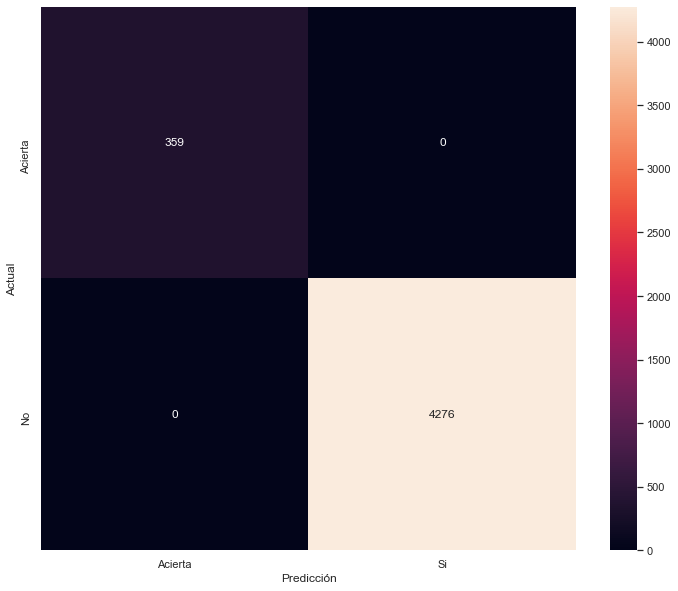

In [173]:

predict_random_forest = random_forest.predict(train_data)
confusion = confusion_matrix(train_label, predict_random_forest)
vn, fp, fn, vp = confusion.ravel()
matriz = np.array([[vp,fn],[fp,vn]])
print(matriz)
plt.figure(
    figsize=(12,10)
)
grafico = plt.subplot()

sbn.heatmap(matriz,annot=True,ax=grafico,
            fmt='g')
grafico.xaxis.set_ticklabels(["Acierta",
                              "Si"])
grafico.yaxis.set_ticklabels(["Acierta","No"])
grafico.set_xlabel('Predicción')
grafico.set_ylabel('Actual')

# Modelos de regresión

### Queremos analizar el puntaje de los modelos de regresión intentando explicar la valoración

In [174]:
#Hacemos el split de la data
train_data_reg, test_data_reg, train_label_reg, test_label_reg = train_test_split(
    df,
    df.Descargas,
    test_size=0.45,
    random_state=2
)

In [175]:
# Obtenemos la puntuación de cada modelo
modelos_regresion = []
resultados_regresion = []
modelos_regresion.append(('KNeighborsRegressor', KNeighborsRegressor()))
modelos_regresion.append(('LinearRegression', LinearRegression()))
modelos_regresion.append(('RandomForestRegressor', RandomForestRegressor()))
modelos_regresion.append(('SVR', SVR()))
modelos_regresion.append(('DecisionTreeRegressor', DecisionTreeRegressor()))

for nombre, modelo in modelos_regresion:
    modelo.fit(train_data_reg, train_label_reg)
    resultado = modelo.score(test_data_reg, test_label_reg)
    resultados_regresion.append(resultado*100)
    print('El modelo {} tiene como resultado {:.2f}%'.format(
        nombre,
        resultado*100
    ))

El modelo KNeighborsRegressor tiene como resultado 100.00%
El modelo LinearRegression tiene como resultado 100.00%
El modelo RandomForestRegressor tiene como resultado 99.80%
El modelo SVR tiene como resultado -2.80%
El modelo DecisionTreeRegressor tiene como resultado 100.00%


In [176]:
# Utilizaremos el árbol de decisión de regresión para explicar la cantidad de descargas
dtr = DecisionTreeRegressor()
dtr.fit(train_data_reg, train_label_reg)
dtr.score(test_data_reg, test_label_reg)

1.0

In [177]:
#
predict_dtr = dtr.predict(train_data_reg)
dtr.fit(train_data, train_label)
resultado = dtr.score(test_data, test_label)
resultado*100
predict_knn = dtr.predict(train_data)
print(predict_dtr, '\n', train_label_reg)

[1.e+04 1.e+07 5.e+05 ... 1.e+03 1.e+04 1.e+05] 
 8500       10000.0
1534    10000000.0
2918      500000.0
1018     1000000.0
5349        1000.0
           ...    
4185     5000000.0
6530        1000.0
7811        1000.0
3008       10000.0
8675      100000.0
Name: Descargas, Length: 4248, dtype: float64


In [178]:
knn = KNeighborsClassifier()
knn.fit(train_data, train_label)
resultado = knn.score(test_data, test_label)
resultado*100
predict_knn = knn.predict(train_data)
print(predict_knn, '\n', train_label)


[0 0 0 ... 0 0 0] 
 229     0
8965    0
6296    0
3658    0
6150    0
       ..
4185    0
6530    0
7811    0
3008    0
8675    0
Name: Tipo_processed, Length: 4635, dtype: int32


In [179]:
predict_knn = knn.predict(train_data)
print(predict_knn, '\n', train_label)

predict_knn.shape

[0 0 0 ... 0 0 0] 
 229     0
8965    0
6296    0
3658    0
6150    0
       ..
4185    0
6530    0
7811    0
3008    0
8675    0
Name: Tipo_processed, Length: 4635, dtype: int32


(4635,)

[[ 130  229]
 [  47 4229]]


Text(84.5, 0.5, 'Actual')

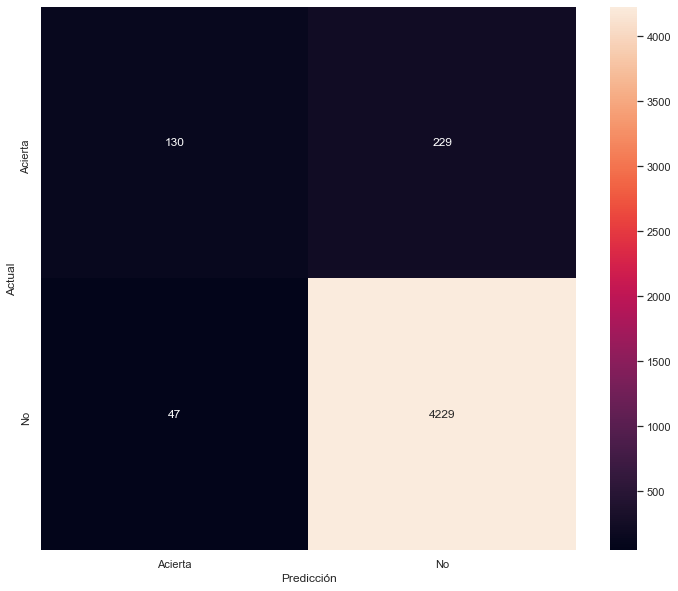

In [180]:
confusion = confusion_matrix(train_label, predict_knn)
vn, fp, fn, vp = confusion.ravel()
matriz = np.array([[vp,fn],[fp,vn]])
print(matriz)
plt.figure(
    figsize=(12,10)
)
grafico = plt.subplot()

sbn.heatmap(matriz,annot=True,ax=grafico,
            fmt='g')
grafico.xaxis.set_ticklabels(["Acierta",
                              "No"])
grafico.yaxis.set_ticklabels(["Acierta","No"])
grafico.set_xlabel('Predicción')
grafico.set_ylabel('Actual')

# Evalúe sus modelos

#### Requerimos las librerías necesarias para la evaluación de los modelos

In [181]:
from sklearn.metrics import accuracy_score #Exactitud
from sklearn.metrics import precision_score #Precisión
from sklearn.metrics import recall_score #Sensibilidad
# Especificidad: tnr = (vn)/(vn+fp)
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


### Evaluamos el Random Forest Classifier

In [182]:
print('El modelo Random Forest tiene una precisión del {:.2f}%'.format(accuracy_score(train_label, predict_random_forest)*100))
print('El modelo Random Forest tiene una sensibilidad del {:.2f}%'.format(recall_score(train_label, predict_random_forest)*100))
print('El modelo tiene un puntaje f1 del {:.2f}%'.format(f1_score(train_label, predict_random_forest)*100))
print('El modelo Random Forest tiene un ROC - AUC del {:.2f}%'.format(roc_auc_score(train_label, predict_random_forest)*100))

El modelo Random Forest tiene una precisión del 100.00%
El modelo Random Forest tiene una sensibilidad del 100.00%
El modelo tiene un puntaje f1 del 100.00%
El modelo Random Forest tiene un ROC - AUC del 100.00%


### Evaluamos el desempeño de KNeighbors Classifier

In [183]:
precision = (vp)/(vp+fp)
recall = (vp)/(vp+fn)
tnr = (vn)/(vn+fp)
f1 =(2 * recall * precision) / (precision + recall)

print('El modelo KNeighbors Classifier tiene una precisión del {:.2f}%'.format( (precision*100)))
print('El modelo KNeighbors Classifier tiene una sensibilidad del {:.2f}%'.format( (recall*100)))
print('El modelo KNeighbors Classifier tiene una especificidad del {:.2f}%'.format( (precision*100)))
print('El modelo KNeighbors Classifier tiene un puntaje f1 del {:.2f}%'.format( (f1*100)))

El modelo KNeighbors Classifier tiene una precisión del 73.45%
El modelo KNeighbors Classifier tiene una sensibilidad del 36.21%
El modelo KNeighbors Classifier tiene una especificidad del 73.45%
El modelo KNeighbors Classifier tiene un puntaje f1 del 48.51%


# Responda las preguntas planteadas


1. ¿Cómo se correlaciona la cantidad de descargas con el tipo de App?
* R: La correlación es negativa (-0.047) 
2. ¿Como se correlaciona la valoración de las apps con su categoría?
* R: La correlación es de 0.041
3. ¿Como se correlaciona la cantidad de descargas con la clasificación?
* R: La correlación es negativa (-0.072) 
4. ¿Es posible predecir la cantidad de descargas que tendrá una app según sus características?
* R: Es posible con un modelo optimizado y mejor entrenado
5. ¿Es posible predecir que tipo de app tendrá mayor éxito considerando sus características?
* R: Es posible con un modelo optimizado y mejor entrenado
6. ¿Es posible predecir el retorno de inversión de una aplicación de pago?
* R: Es posible con un modelo optimizado y mejor entrenado

#### Conclusiones

Si bien en este ejercicio no pudieron realizarse grandes predicciones ni un modelo perfectamente entrenado con el cuál poder generar hipótesis de valor con el cuál guiar la toma de decisiones, este ejercicio fué util para conocer procedimientos para trabajar la información con herramientas de machine learning en Python.

Se hace la autocrítica y reflexión, es necesario seguir estudiando y capacitándose en esta materia y aplicar las herramientas para generar conclusiones acertadas mediante los modelos de ML.

Por otra parte, en necesario optimizar el código python para agilizar e idealmente automatizar la creación, aplicación, entrenamiento y medición de los modelos, para de esta forma ganar tiempo y mejorar los pipelines de cara a procedimientos de integración contínua y entrega continuo (CI-CD).